# Задание
1) Выбрать хорошую (сложную) 3D модель как polygon mesh
2) Трансфигурировать модель в разные формы представления данных:
   1) воксильную,
   2) облако точек,
   3) функциональную,
   4) карту глубины.

In [1]:
import numpy as np
import trimesh

In [2]:
mesh = trimesh.load_mesh('../data/Skull/12140_Skull_v3_L2.obj')
mesh.show()

## Трансфигурация polygon mesh в voxel

In [4]:
voxel_mesh = mesh.voxelized(1)
voxel_mesh.show()

## Трансфигурация polygon mesh в point cloud

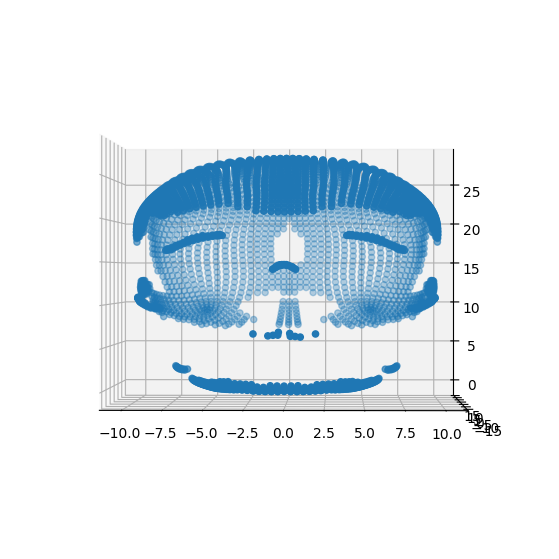

In [18]:
points_mesh = trimesh.convex.hull_points(mesh)
# Метод show от trimesh перестал работать, поэтому использую matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d');
x = points_mesh[:,0]
y = points_mesh[:,1]
z = points_mesh[:,2]
ax.scatter3D(x, y, z);
ax.view_init(0, -89)
plt.show()

## Трансфигурация polygon mesh в depth map

In [1]:
import PIL.Image
#  mesh = trimesh.load('../models/featuretype.STL')

# сцена будет иметь автоматически сгенерированную камеру и освещение
scene = mesh.scene()

# любое из автоматически сгенерированных значений может быть переопределено
# устанавливаем разрешение в пикселях
scene.camera.resolution = [640, 480]
# установить поле зрения, в градусах
# сделать это относительно разрешения, чтобы количество пикселей на градус было одинаковым
scene.camera.fov = 60 * (scene.camera.resolution /
                            scene.camera.resolution.max())

# преобразовать камеру в лучи с одним лучом на пиксель
origins, vectors, pixels = scene.camera_rays()

# выполнять настоящие запросы Ray-Mesh
points, index_ray, index_tri = mesh.ray.intersects_location(
    origins, vectors, multiple_hits=False)

# для каждого попадания найдите расстояние по его вектору
depth = trimesh.util.diagonal_dot(points - origins[0],
                                    vectors[index_ray])
# найти пиксельные местоположения реальных попаданий
pixel_ray = pixels[index_ray]

# создайте массив numpy, который мы можем превратить в изображение
# выполнение с помощью uint8 создает изображение в оттенках серого в режиме `L`
a = np.zeros(scene.camera.resolution, dtype=np.uint8)

# глубина шкалы в зависимости от диапазона (0,0–1,0)
depth_float = ((depth - depth.min()) / depth.ptp())

# преобразовать глубину в 0–255 uint8
depth_int = (depth_float * 255).round().astype(np.uint8)
# назначать глубину правильным местоположениям пикселей
a[pixel_ray[:, 0], pixel_ray[:, 1]] = depth_int
# создать изображение PIL из запросов глубины
img = PIL.Image.fromarray(a)

# покажи получившееся изображение
img.show()

NameError: name 'mesh' is not defined